In [13]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunCleaner import *
from random import uniform

In [14]:
#so then all center ellipses:  (these are the GLOBAL origins)
origin1 = [0,-128,0] #x,y (ellipse1)
origin2 = [64.15,-128,0] #x,y (ellipse2)
origin3 = [0,128,0] #x,y (ellipse3)
origin4 = [64.15,128,0] #x,y  (ellipse4)
coeffellipse = [263.9,256,64.15] 
thet = [0,0,0]

X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')
X1n,Y1n,Z1n,X2n,Y2n,Z2n = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'neg')

Xset1, Yset1, Zset1 = SR2(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = SR2(32.07, X2, Y2, Z2, origin1)
Xset1n, Yset1n, Zset1n = SR2(32.07, X1n,Y1n,Z1n, origin1)
Xset2n, Yset2n, Zset2n = SR2(32.07, X2n, Y2n, Z2n, origin1)


#ellipse 1
X1i,Y1i,Z1i = transform(Xset1,Yset1,Zset1,origin1,thet)
X2i,Y2i,Z2i = transform(Xset2,Yset2,Zset2,origin1,thet)

#ellipse 3
X1n,Y1n,Z1n = transform(Xset1n,Yset1n,Zset1n,origin3,thet)
X2n,Y2n,Z2n = transform(Xset2n,Yset2n,Zset2n,origin3,thet)

#ellipse 2
X3,Y3,Z3 = transform(Xset1,Yset1,Zset1,origin2,thet)
X4,Y4,Z4 = transform(Xset2,Yset2,Zset2,origin2,thet)

#ellipse 4
X3n,Y3n,Z3n = transform(Xset1n,Yset1n,Zset1n,origin4,thet)
X4n,Y4n,Z4n = transform(Xset2n,Yset2n,Zset2n,origin4,thet)


pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'red')
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'yellow', label = "Ellipse2")
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'yellow')
pl3dsurf.plot_trisurf(X3,Y3,Z3, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X4,Y4,Z4, linewidth = .2, antialiased=True, color = 'red')
pl3dsurf.plot_trisurf(X3n,Y3n,Z3n, linewidth = .2, antialiased=True, color = 'yellow', label = "Ellipse2")
pl3dsurf.plot_trisurf(X4n,Y4n,Z4n, linewidth = .2, antialiased=True, color = 'yellow')

pl.show()

In [15]:
pli1 = [0,120,0] #GLOBALLY
theta1 = np.pi/2
specnum1 = 3000
xrange1 = 32
coeffellipse = [263.9,256,64.15]
x,y,z, vectors1 = spec(1000)
ellipseorigin1 = [0,0,0] #LOCALLY. Globally it is ORIGIN1
ellipsethetaxyz1 = [0,0,0]



#going to ellipse3 (all global??)
xi,yi,zi,xr,yr,zr, pointints1, vect1 = RSEPC(coeffellipse,pli1,vectors1, xrange1, ellipseorigin1,ellipsethetaxyz1, 'pos')


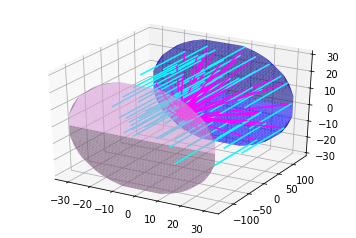

In [27]:
#REFLECTIONS OFF OF ELLIPSE 1
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7) #GLOBAL
for n in range (0,len(xi)):
    xi1,yi1,zi1 = xi[n],yi[n],zi[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin1,thet)
    xr1,yr1,zr1 = xr[n],yr[n],zr[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin1,thet)
    #pl3dsurf.scatter((transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[0],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[1],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[2], color = 'black')
    pl3dsurf.plot(xt,yt,zt,color = 'magenta') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua') #reflected
    #pl3dsurf.plot(transform(xi[n][0],xi[n][1],xi[n][2],origin1,thet),transform(yi[n][0],yi[n][1],yi[n][2],origin1,thet),transform(zi[n][0],zi[n][1],zi[n][2],origin1,thet), color = 'yellow') #intial
    #pl3dsurf.plot(transform(xr[n][0],xr[n][1],xr[n][2],origin1,thet),transform(yr[n][0],yr[n][1],yr[n][2],origin1,thet),transform(zr[n][0],zr[n][1],zr[n][2],origin1,thet), color = 'green') #reflected

pl.show()

#figure out transforming origin1,thet



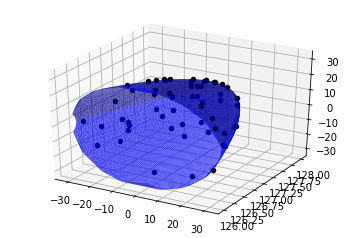

In [17]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
for n in range (0,len(xi)):
    pl3dsurf.scatter((transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[0],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[1],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[2], color = 'black')
pl.show()
#intersection points APPROPRIATELY TRANSFORMED to origin1

In [18]:
#ok SO LOCALLY placed correctly when TRANSFORMED TO ORIGIN1
#SHIFT FROM ONE LOCAL TO ANOTHER LOCAL then TRANSFORM to global
xrange1 = 32
coeffellipse = [263.9,256,64.15] 
vectors2 = negvect(vect1) #vectors from reflected. 
x,y,z = sep(pointints1) #MAKES LIST OF X,Y,Z instead of list of points
#originshift = [0,256,0]
negorigin3 = [0,-128,0]
x,y,z = transform(x,y,z,negorigin3,thet) #shifts origins, to LOCAL
pli2 = sepop(x,y,z)
ellipseorigin2 = [0,0,0] #LOCALLY
ellipsethetaxyz1 = [0,0,0]

xi2,yi2,zi2,xr2,yr2,zr2, pointints2, vect2 = RSEPC(coeffellipse,pli2,vectors2, xrange1, ellipseorigin2,ellipsethetaxyz1, 'neg')


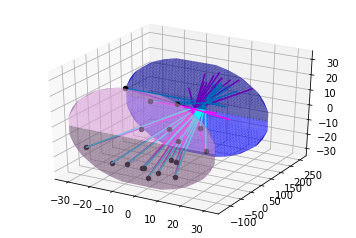

In [21]:
#REFLECTIONS OFF OF ELLIPSE3
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
for n in range (0,len(xi2)):   
    pl3dsurf.scatter((transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[0],(transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[1],(transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi2[n],yi2[n],zi2[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin3,thet) #transformed BACK to global?
    xr1,yr1,zr1 = xr2[n],yr2[n],zr2[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin3,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'magenta') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua') #reflected

pl.show()

#figure out transforming origin1,thet

In [22]:
#SHIFT FROM ONE LOCAL TO ANOTHER LOCAL then TRANSFORM to global
xrange1 = 32
coeffellipse = [263.9,256,64.15] 
vectors3 = negvect(vect1) #vectors from reflected. 
x,y,z = sep(pointints1) #MAKES LIST OF X,Y,Z instead of list of points
#originshift = [0,256,0]
negorigin4 = [-64.15,-128,0]
x,y,z = transform(x,y,z,negorigin4,thet) #shifts origins, BUT IS IT CORRECT??
pli3 = sepop(x,y,z)
ellipseorigin4 = [0,0,0] #LOCALLY
ellipsethetaxyz1 = [0,0,0]

xi3,yi3,zi3,xr3,yr3,zr3, pointints3, vect3 = RSEPC(coeffellipse,pli3,vectors3, xrange1, ellipseorigin4,ellipsethetaxyz1, 'neg')


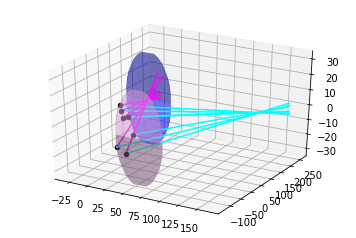

In [25]:
#REFLECTIONS OFF OF ELLIPSE3
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X3n,Y3n,Z3n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
pl3dsurf.plot_trisurf(X4n,Y4n,Z4n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
for n in range (0,len(xi3)):   
    pl3dsurf.scatter((transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[0],(transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[1],(transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi3[n],yi3[n],zi3[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin4,thet) #transformed BACK to global?
    xr1,yr1,zr1 = xr3[n],yr3[n],zr3[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin4,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'magenta') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua') #reflected

pl.show()

#figure out transforming origin1,thet

In [36]:
#reflections from ellipse 3 to ellipse 2
xrange1 = 32
coeffellipse = [263.9,256,64.15] 
vectors4 = negvect(vect2) #vectors from reflected. 
x,y,z = sep(pointints2) #MAKES LIST OF X,Y,Z instead of list of points
#originshift = [0,256,0]
negorigin2 = [-64.15,128,0]
x,y,z = transform(x,y,z,negorigin2,thet) #shifts origins, BUT IS IT CORRECT??
pli4 = sepop(x,y,z)
ellipseorigin4 = [0,0,0] #LOCALLY
ellipsethetaxyz1 = [0,0,0]

xi4,yi4,zi4,xr4,yr4,zr4, pointints4, vect4 = RSEPC(coeffellipse,pli4,vect2, xrange1, ellipseorigin4,ellipsethetaxyz1, 'pos')


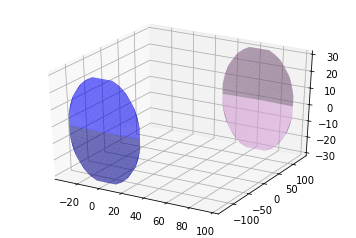

In [37]:
#REFLECTIONS OFF OF ELLIPSE2 from ellipse 3 (none?)
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X3,Y3,Z3, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
pl3dsurf.plot_trisurf(X4,Y4,Z4, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
for n in range (0,len(xi4)):   
    pl3dsurf.scatter((transform(pointints4[n][0], pointints4[n][1], pointints4[n][2],origin2,thet))[0],(transform(pointints4[n][0], pointints4[n][1], pointints4[n][2],origin2,thet))[1],(transform(pointints4[n][0], pointints4[n][1], pointints4[n][2],origin2,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi4[n],yi4[n],zi4[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin2,thet) #transformed BACK to global?
    xr1,yr1,zr1 = xr4[n],yr4[n],zr4[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin2,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'magenta') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua') #reflected

pl.show()

#figure out transforming origin1,thet

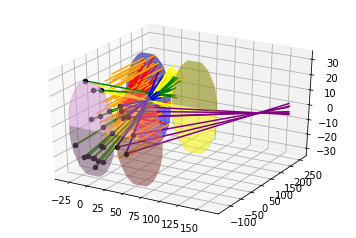

In [41]:
# combination of ellipse 1, 3, and 4 
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7) #GLOBAL
pl3dsurf.plot_trisurf(X3n,Y3n,Z3n, linewidth = .2, antialiased=True, color = 'salmon',alpha=0.7) #global
pl3dsurf.plot_trisurf(X4n,Y4n,Z4n, linewidth = .2, antialiased=True, color = 'salmon',alpha=0.7)
pl3dsurf.plot_trisurf(X3,Y3,Z3, linewidth = .2, antialiased=True, color = 'yellow',alpha=0.7)
pl3dsurf.plot_trisurf(X4,Y4,Z4, linewidth = .2, antialiased=True, color = 'yellow',alpha=0.7)
for n in range (0,len(xi)):
    xi1,yi1,zi1 = xi[n],yi[n],zi[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin1,thet)
    xr1,yr1,zr1 = xr[n],yr[n],zr[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin1,thet)
    #pl3dsurf.scatter((transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[0],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[1],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[2], color = 'black')
    pl3dsurf.plot(xt,yt,zt,color = 'red') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'orange') #reflected
for n in range (0,len(xi2)):   
    pl3dsurf.scatter((transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[0],(transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[1],(transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi2[n],yi2[n],zi2[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin3,thet) #transformed BACK to global?
    xr1,yr1,zr1 = xr2[n],yr2[n],zr2[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin3,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'yellow') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'green') #reflected
for n in range (0,len(xi3)):   
    pl3dsurf.scatter((transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[0],(transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[1],(transform(pointints3[n][0], pointints3[n][1], pointints3[n][2],origin4,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi3[n],yi3[n],zi3[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin4,thet) #transformed BACK to global?
    xr1,yr1,zr1 = xr3[n],yr3[n],zr3[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin4,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'blue') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'purple') #reflected
pl.show()